In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


In [2]:
from pathlib import Path

DATA_DIR = Path("../data/raw")

bigmart = pd.read_csv(DATA_DIR / "bigmart_dataset.csv")
flipkart = pd.read_csv(DATA_DIR / "flipkart_dataset.csv")
online_retail = pd.read_csv(DATA_DIR / "Online_Retail.csv", encoding="latin1")

In [3]:
bigmart.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
bigmart.info()

<class 'pandas.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   str    
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   str    
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   str    
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   str    
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   str    
 9   LocationType       5681 non-null   str    
 10  OutletType         5681 non-null   str    
dtypes: float64(3), int64(1), str(7)
memory usage: 488.3 KB


In [5]:
bigmart.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
bigmart.isna().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [9]:
num_cols = bigmart.select_dtypes(include=["int64", "float64"]).columns
cat_cols = bigmart.select_dtypes(include=["object"]).columns

num_cols, cat_cols

/var/folders/h8/g316pc_92bgcb77n8184fgx00000gn/T/ipykernel_33164/598445830.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = bigmart.select_dtypes(include=["object"]).columns


(Index(['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear'], dtype='str'),
 Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
        'LocationType', 'OutletType'],
       dtype='str'))

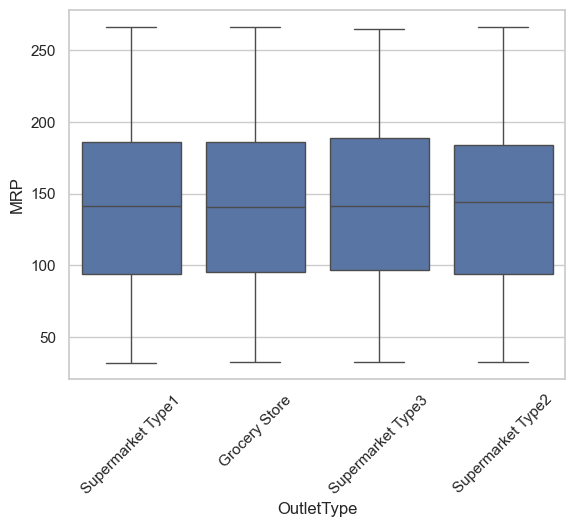

In [10]:
sns.boxplot(x="OutletType", y="MRP", data=bigmart)
plt.xticks(rotation=45)
plt.show()